In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from scipy.signal import butter, filtfilt, find_peaks, medfilt
from sklearn import preprocessing
%matplotlib notebook

In [2]:
df_test = pd.read_csv('2022-01-07-17-22-37.csv', names = ['ts_ecg', 'ecg', 'ts_ppg', 'ppg'])
df_bre = pd.read_csv('hold_breadth_start30.csv', names = ['ts_ecg', 'ecg', 'ts_ppg', 'ppg'])
df_val = pd.read_csv('valsaval_start30.csv', names= ['ts_ecg', 'ecg', 'ts_ppg', 'ppg'])
df_val2 = pd.read_csv('valsalva_2.csv', names= ['ts_ecg', 'ecg', 'ts_ppg', 'ppg'])
df_muscle = pd.read_csv('muscle_start30.csv', names= ['ts_ecg', 'ecg', 'ts_ppg', 'ppg'])

In [3]:
ecg_bre = df_bre['ecg'].values[5:]
ppg_bre = df_bre['ppg'].values[5:]

ecg_val = df_val['ecg'].values[5:]
ppg_val = df_val['ppg'].values[5:]

ecg_val2 = df_val2['ecg'].values[5:]
ppg_val2 = df_val2['ppg'].values[5:]

ecg_mus = df_muscle['ecg'].values[5:]
ppg_mus = df_muscle['ppg'].values[5:]

In [4]:
bre_st_idx = df_bre[df_bre['ts_ecg']==30390].index.to_numpy()-5
bre_end_idx = df_bre[df_bre['ts_ecg']==50258].index.to_numpy()-5

val_st_idx = df_val[df_val['ts_ecg']==30335].index.to_numpy()-5
val_end_idx = df_val[df_val['ts_ecg']==40115].index.to_numpy()-5

val_st_idx2 = df_val2[df_val2['ts_ecg']==29253].index.to_numpy()-5
val_end_idx2 = df_val2[df_val2['ts_ecg']==40303].index.to_numpy()-5

mus_st_idx = df_muscle[df_muscle['ts_ecg']==30393].index.to_numpy()-5
mus_end_idx = df_muscle[df_muscle['ts_ecg']==45589].index.to_numpy()-5

In [5]:
#butterworth filter & filtering
def butter_filtering(sig,fs,fc,order,btype): 
    """
    sig: original signal
    fs: sampling frequency
    fc: cut off frequency
    order: order of filter
    btype: type of filter (highpass/lowpass/bandpass)
    
    return: filtered signal
    """
    w = np.array(fc)/(fs/2)
    b, a = butter(order, w, btype =btype, analog=False)
    filtered = filtfilt(b, a, sig)
    return(filtered)

## Valsalva

In [6]:
ecg_f = butter_filtering(ecg_val2, 200, [0.1, 50], 5, 'bandpass')
ppg_f = butter_filtering(ppg_val2, 200, [0.5, 10], 5, 'bandpass')

In [7]:
from biosppy.signals import ecg

<IPython.core.display.Javascript object>


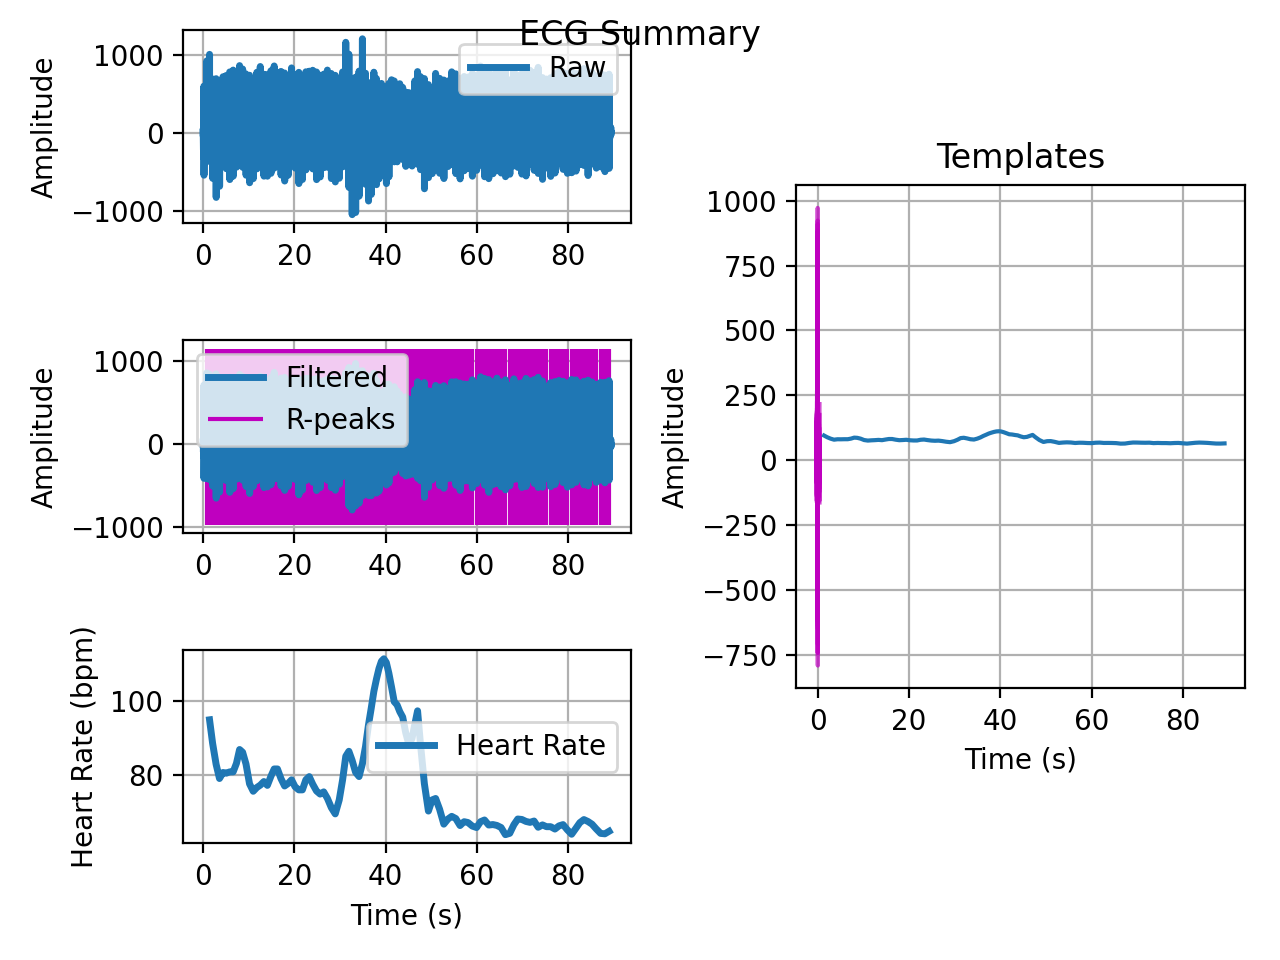

In [8]:
ecg_feat = ecg.ecg(-1*ecg_f, sampling_rate=200.0, show=True)

In [9]:
ts = ecg_feat[0]
filtered = ecg_feat[1]
rpeaks = ecg_feat[2]
templates_ts = ecg_feat[3]
templates = ecg_feat[4]
heart_rate_ts = ecg_feat[5]
heart_rate = ecg_feat[6]

In [10]:
plt.plot(heart_rate_ts, heart_rate)
print(heart_rate_ts)

[ 1.395  2.065  2.83   3.575  4.345  5.065  5.815  6.575  7.295  7.985
  8.65   9.39  10.165 10.975 11.775 12.52  13.31  14.08  14.855 15.575
 16.29  17.065 17.86  18.63  19.385 20.15  20.98  21.76  22.525 23.27
 24.025 24.855 25.655 26.435 27.245 28.105 28.97  29.84  30.58  31.28
 31.96  32.665 33.43  34.195 34.93  35.605 36.255 36.86  37.445 38.01
 38.56  39.1   39.635 40.175 40.73  41.31  41.91  42.535 43.13  43.765
 44.42  45.1   45.805 46.43  47.03  47.655 48.52  49.41  50.225 50.99
 51.865 52.79  53.695 54.52  55.415 56.345 57.24  58.095 59.035 59.97
 60.84  61.715 62.63  63.555 64.425 65.35  66.3   67.25  68.16  69.015
 69.9   70.815 71.69  72.585 73.485 74.43  75.3   76.22  77.165 78.06
 78.945 79.875 80.83  81.765 82.63  83.52  84.42  85.305 86.225 87.18
 88.115 89.04 ]


<IPython.core.display.Javascript object>


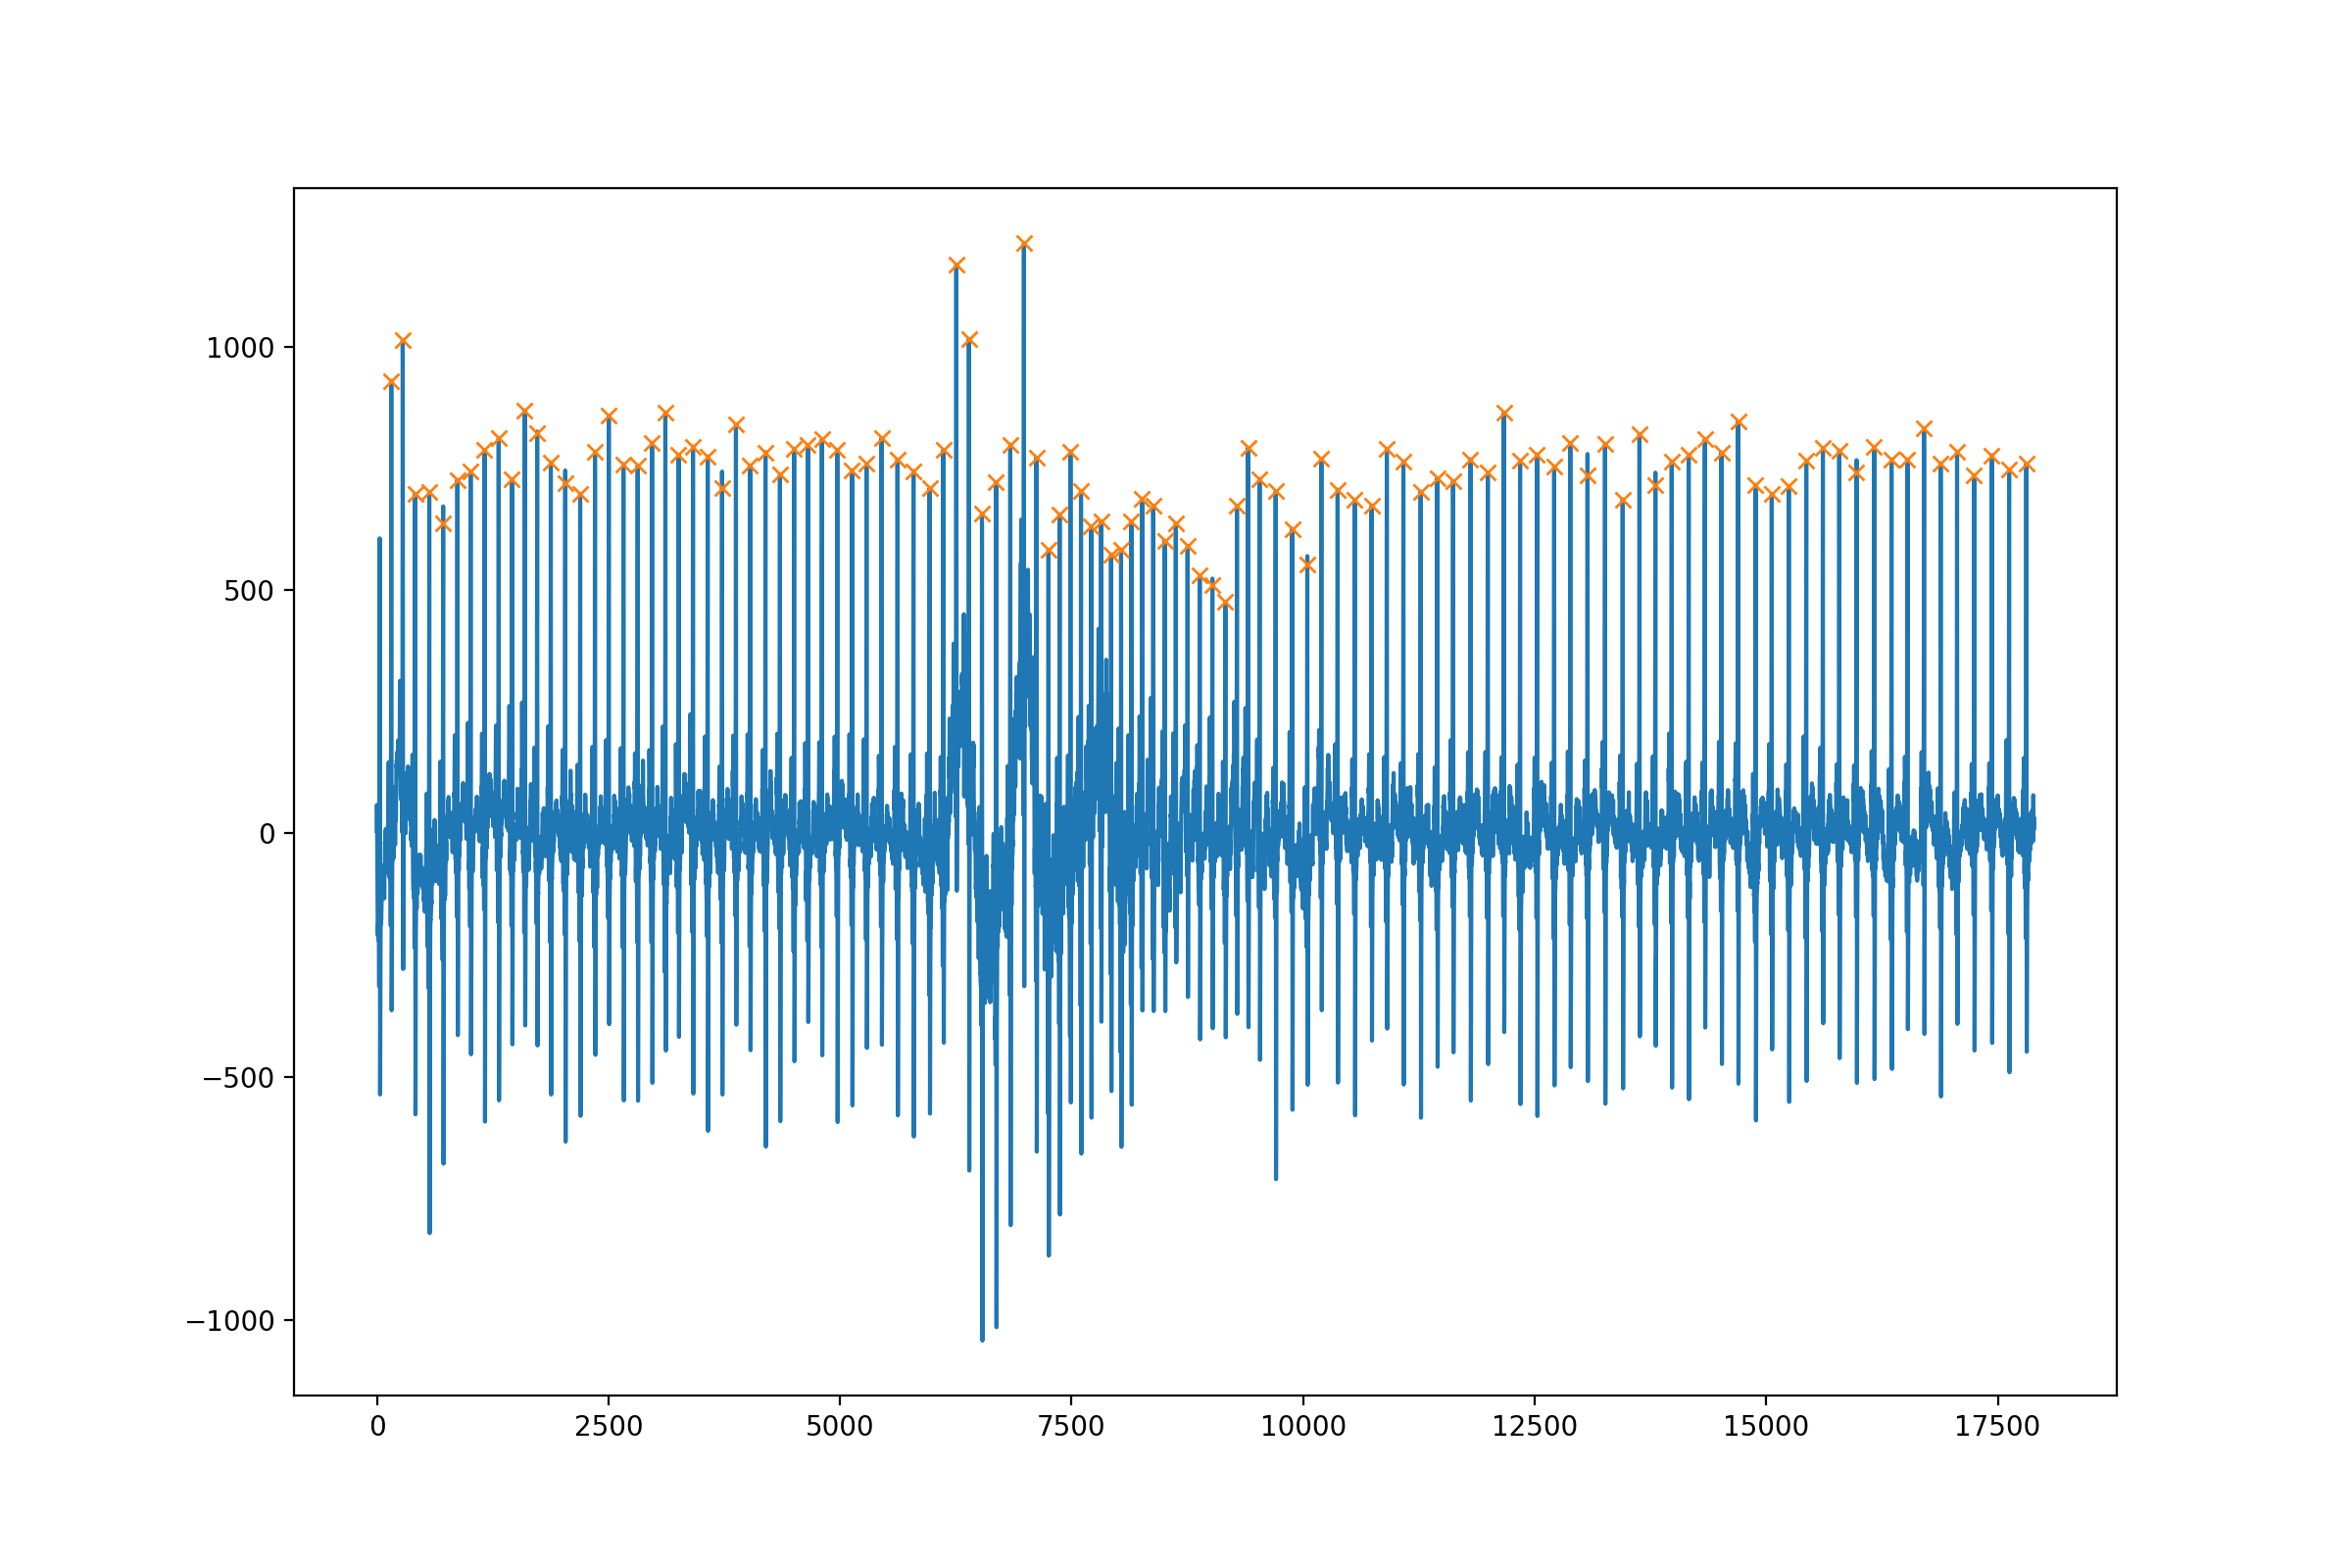

In [11]:
#rpeaks in ecg
plt.figure(figsize = (12,8))
plt.plot(-1*ecg_f)
plt.plot(rpeaks, -1*ecg_f[rpeaks], 'x')


In [12]:
val_st_idx2

array([5812])

In [13]:
import neurokit2 as nk

<IPython.core.display.Javascript object>


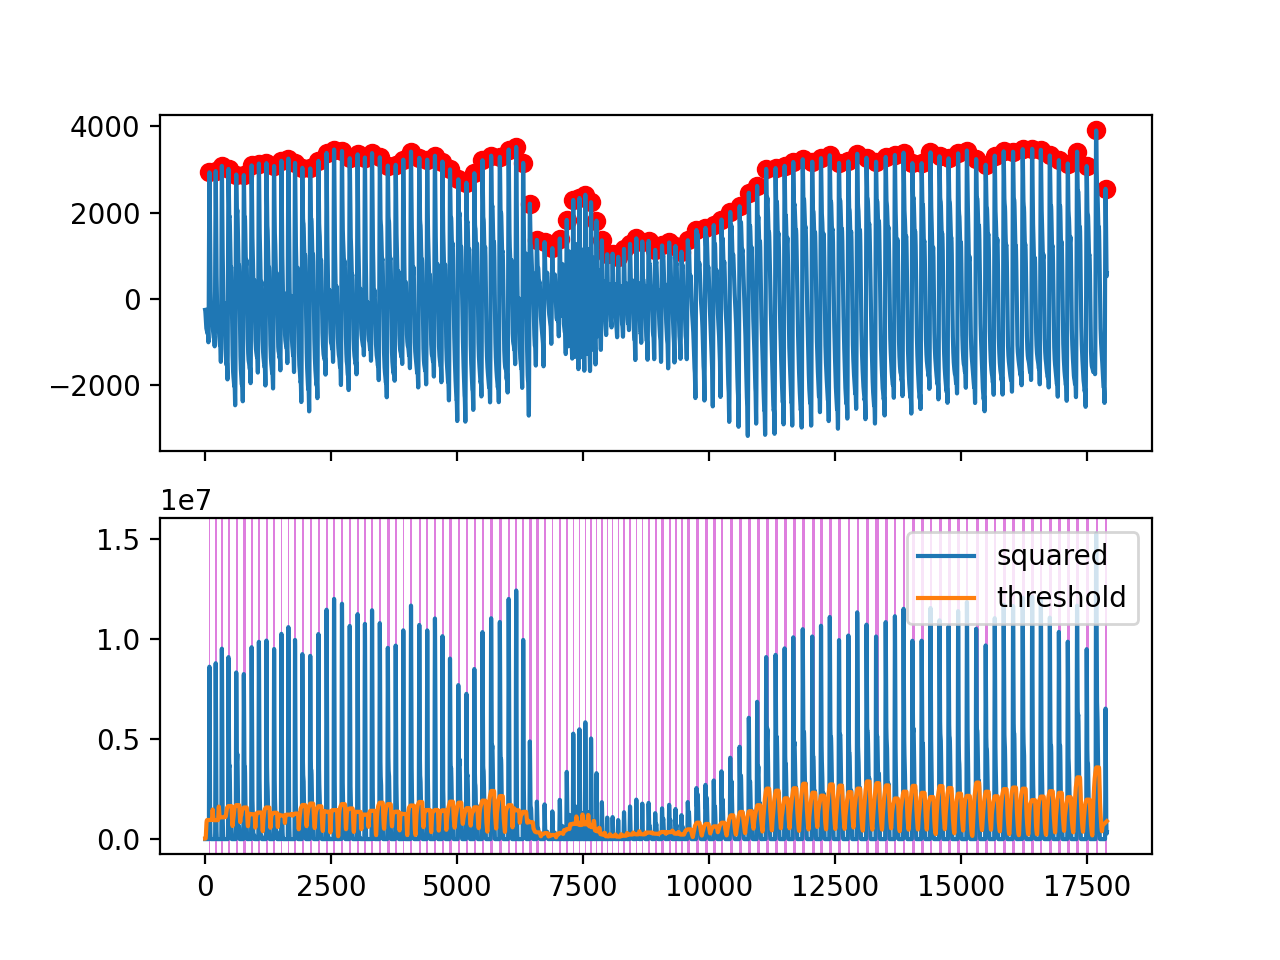

In [14]:
info = nk.ppg_findpeaks(-1*ppg_f, sampling_rate=200, method='elgendi', show=True)

<IPython.core.display.Javascript object>


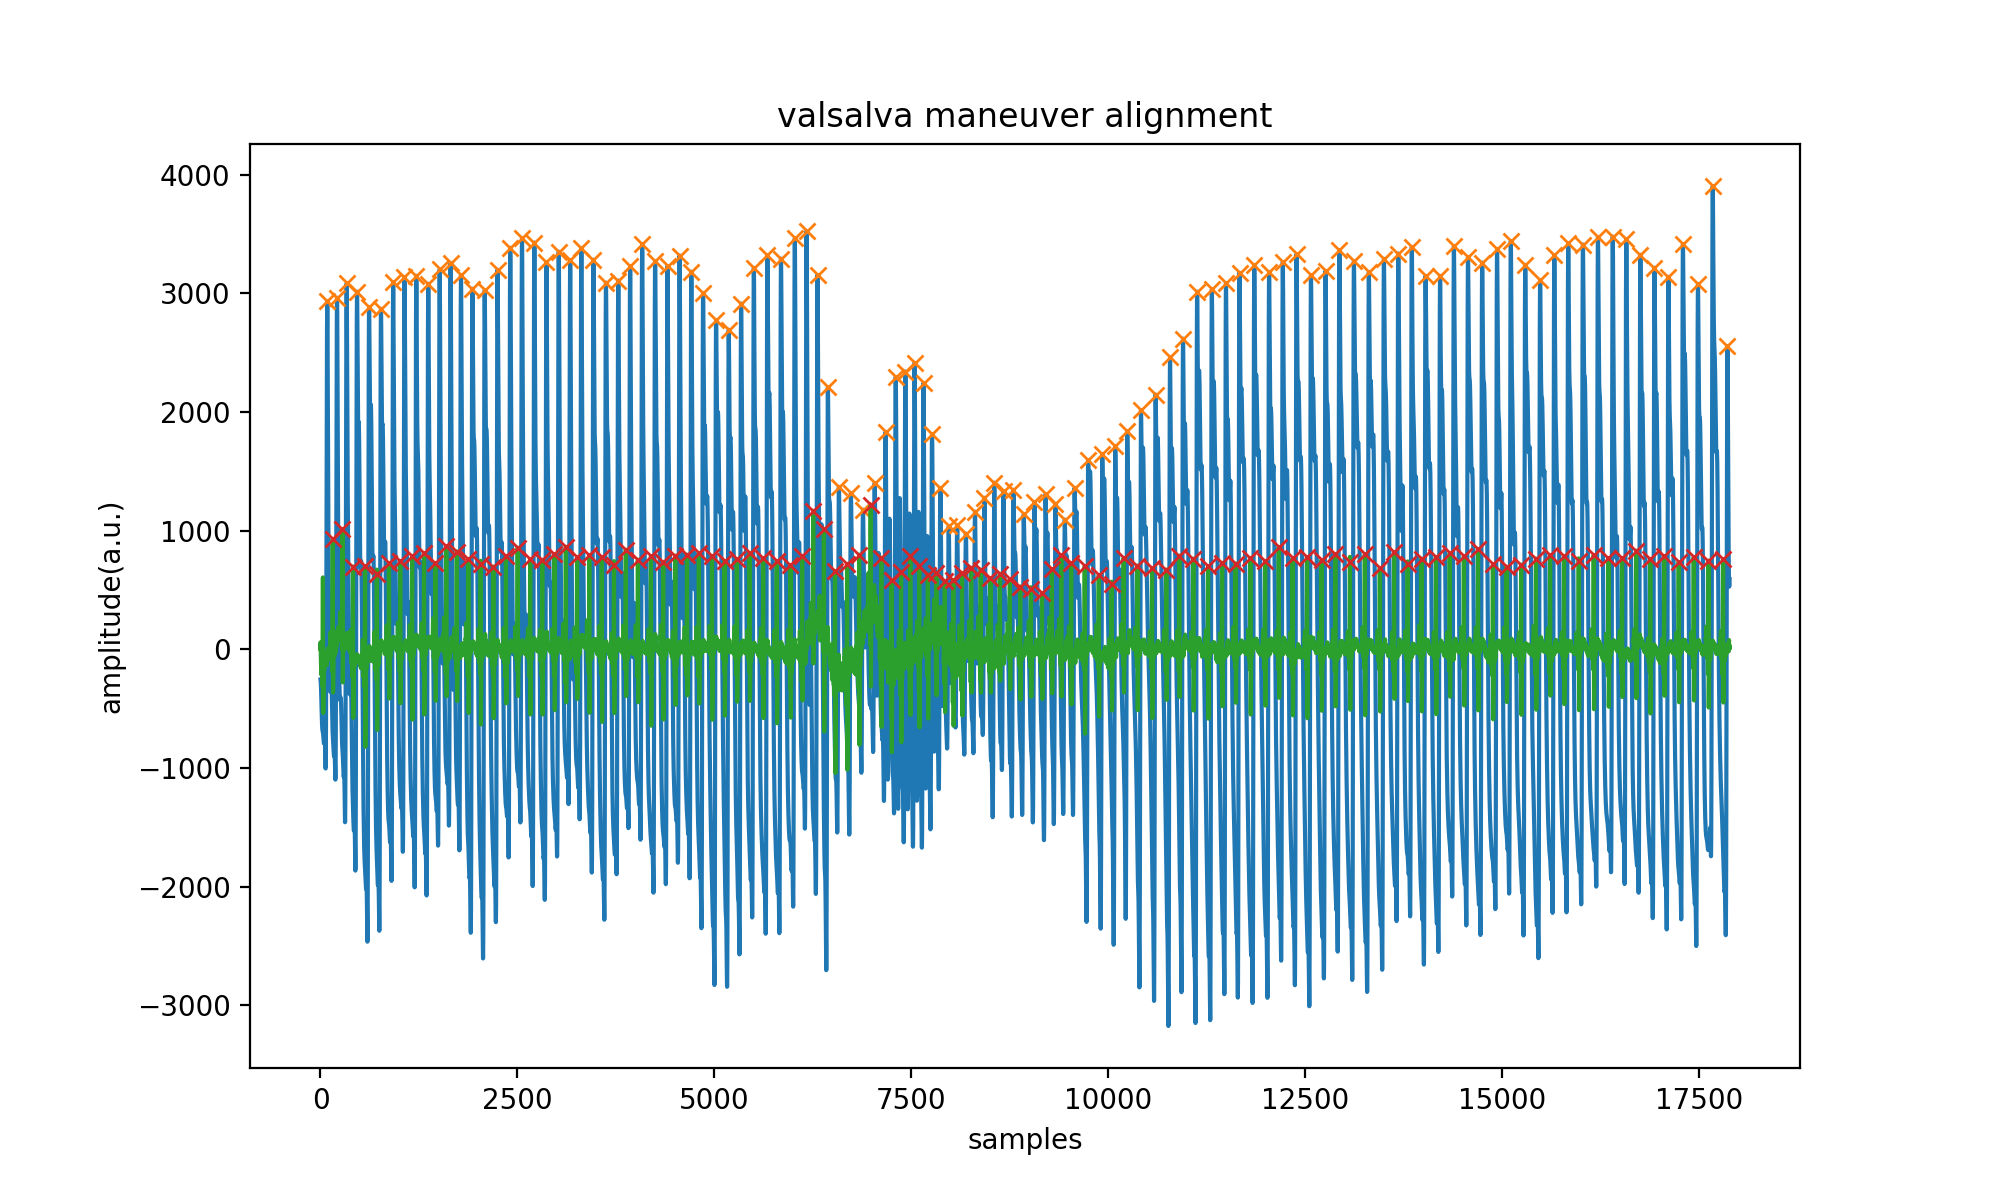

Text(0, 0.5, 'amplitude(a.u.)')

In [15]:
#systolic peaks in ppg
ppeaks = info['PPG_Peaks'] 
plt.figure(figsize = (10,6))
plt.plot(-1*ppg_f)
plt.plot(ppeaks, -1*ppg_f[ppeaks], 'x')

plt.plot(-1*ecg_f)
plt.plot(rpeaks, -1*ecg_f[rpeaks], 'x')
plt.title('valsalva maneuver alignment')

plt.xlabel('samples');plt.ylabel('amplitude(a.u.)')


In [16]:
print(rpeaks)
print(ppeaks)


[  156   279   413   566   715   869  1013  1163  1315  1459  1597  1730
  1878  2033  2195  2355  2504  2662  2816  2971  3115  3258  3413  3572
  3726  3877  4030  4196  4352  4505  4654  4805  4971  5131  5287  5449
  5621  5794  5968  6116  6256  6392  6533  6686  6839  6986  7121  7251
  7372  7489  7602  7712  7820  7927  8035  8146  8262  8382  8507  8626
  8753  8884  9020  9161  9286  9406  9531  9704  9882 10045 10198 10373
 10558 10739 10904 11083 11269 11448 11619 11807 11994 12168 12343 12526
 12711 12885 13070 13260 13450 13632 13803 13980 14163 14338 14517 14697
 14886 15060 15244 15433 15612 15789 15975 16166 16353 16526 16704 16884
 17061 17245 17436 17623 17808]
[   86   211   333   465   618   768   923  1067  1217  1369  1514  1652
  1784  1929  2086  2248  2410  2559  2716  2870  3026  3171  3312  3466
  3625  3781  3932  4085  4249  4407  4560  4709  4858  5024  5184  5341
  5503  5675  5847  6023  6172  6311  6443  6582  6735  6889  7037  7175
  7304  7427  7543 

In [17]:
cor = np.where(ppeaks>=rpeaks[0])
#only find ppeaks after rpeaks                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [18]:
ppeaks_cor = ppeaks[cor]

#ppeaks_cor = np.delete(ppeaks_cor, np.where(ppeaks_cor == 14098))

In [19]:
print(ppeaks_cor)
print(rpeaks)
#print(maxslope_cor)

[  211   333   465   618   768   923  1067  1217  1369  1514  1652  1784
  1929  2086  2248  2410  2559  2716  2870  3026  3171  3312  3466  3625
  3781  3932  4085  4249  4407  4560  4709  4858  5024  5184  5341  5503
  5675  5847  6023  6172  6311  6443  6582  6735  6889  7037  7175  7304
  7427  7543  7657  7765  7871  7977  8084  8195  8311  8430  8555  8673
  8798  8929  9065  9206  9332  9451  9576  9748  9927 10092 10244 10418
 10604 10787 10952 11131 11318 11497 11669 11857 12045 12219 12393 12576
 12762 12937 13122 13311 13503 13685 13857 14032 14216 14391 14570 14750
 14939 15114 15297 15486 15666 15843 16029 16220 16408 16580 16759 16938
 17115 17299 17490 17678 17864]
[  156   279   413   566   715   869  1013  1163  1315  1459  1597  1730
  1878  2033  2195  2355  2504  2662  2816  2971  3115  3258  3413  3572
  3726  3877  4030  4196  4352  4505  4654  4805  4971  5131  5287  5449
  5621  5794  5968  6116  6256  6392  6533  6686  6839  6986  7121  7251
  7372  7489  7602 

In [20]:
PAT = (ppeaks_cor - rpeaks)/200
#PATd = (maxslope_cor[:-1]-rpeaks[:-3])/200

In [21]:
print(PAT)

[0.275 0.27  0.26  0.26  0.265 0.27  0.27  0.27  0.27  0.275 0.275 0.27
 0.255 0.265 0.265 0.275 0.275 0.27  0.27  0.275 0.28  0.27  0.265 0.265
 0.275 0.275 0.275 0.265 0.275 0.275 0.275 0.265 0.265 0.265 0.27  0.27
 0.27  0.265 0.275 0.28  0.275 0.255 0.245 0.245 0.25  0.255 0.27  0.265
 0.275 0.27  0.275 0.265 0.255 0.25  0.245 0.245 0.245 0.24  0.24  0.235
 0.225 0.225 0.225 0.225 0.23  0.225 0.225 0.22  0.225 0.235 0.23  0.225
 0.23  0.24  0.24  0.24  0.245 0.245 0.25  0.25  0.255 0.255 0.25  0.25
 0.255 0.26  0.26  0.255 0.265 0.265 0.27  0.26  0.265 0.265 0.265 0.265
 0.265 0.27  0.265 0.265 0.27  0.27  0.27  0.27  0.275 0.27  0.275 0.27
 0.27  0.27  0.27  0.275 0.28 ]


In [22]:
PAT_ts = rpeaks/200

In [23]:
#plt.plot(PAT_ts, PAT)

<IPython.core.display.Javascript object>


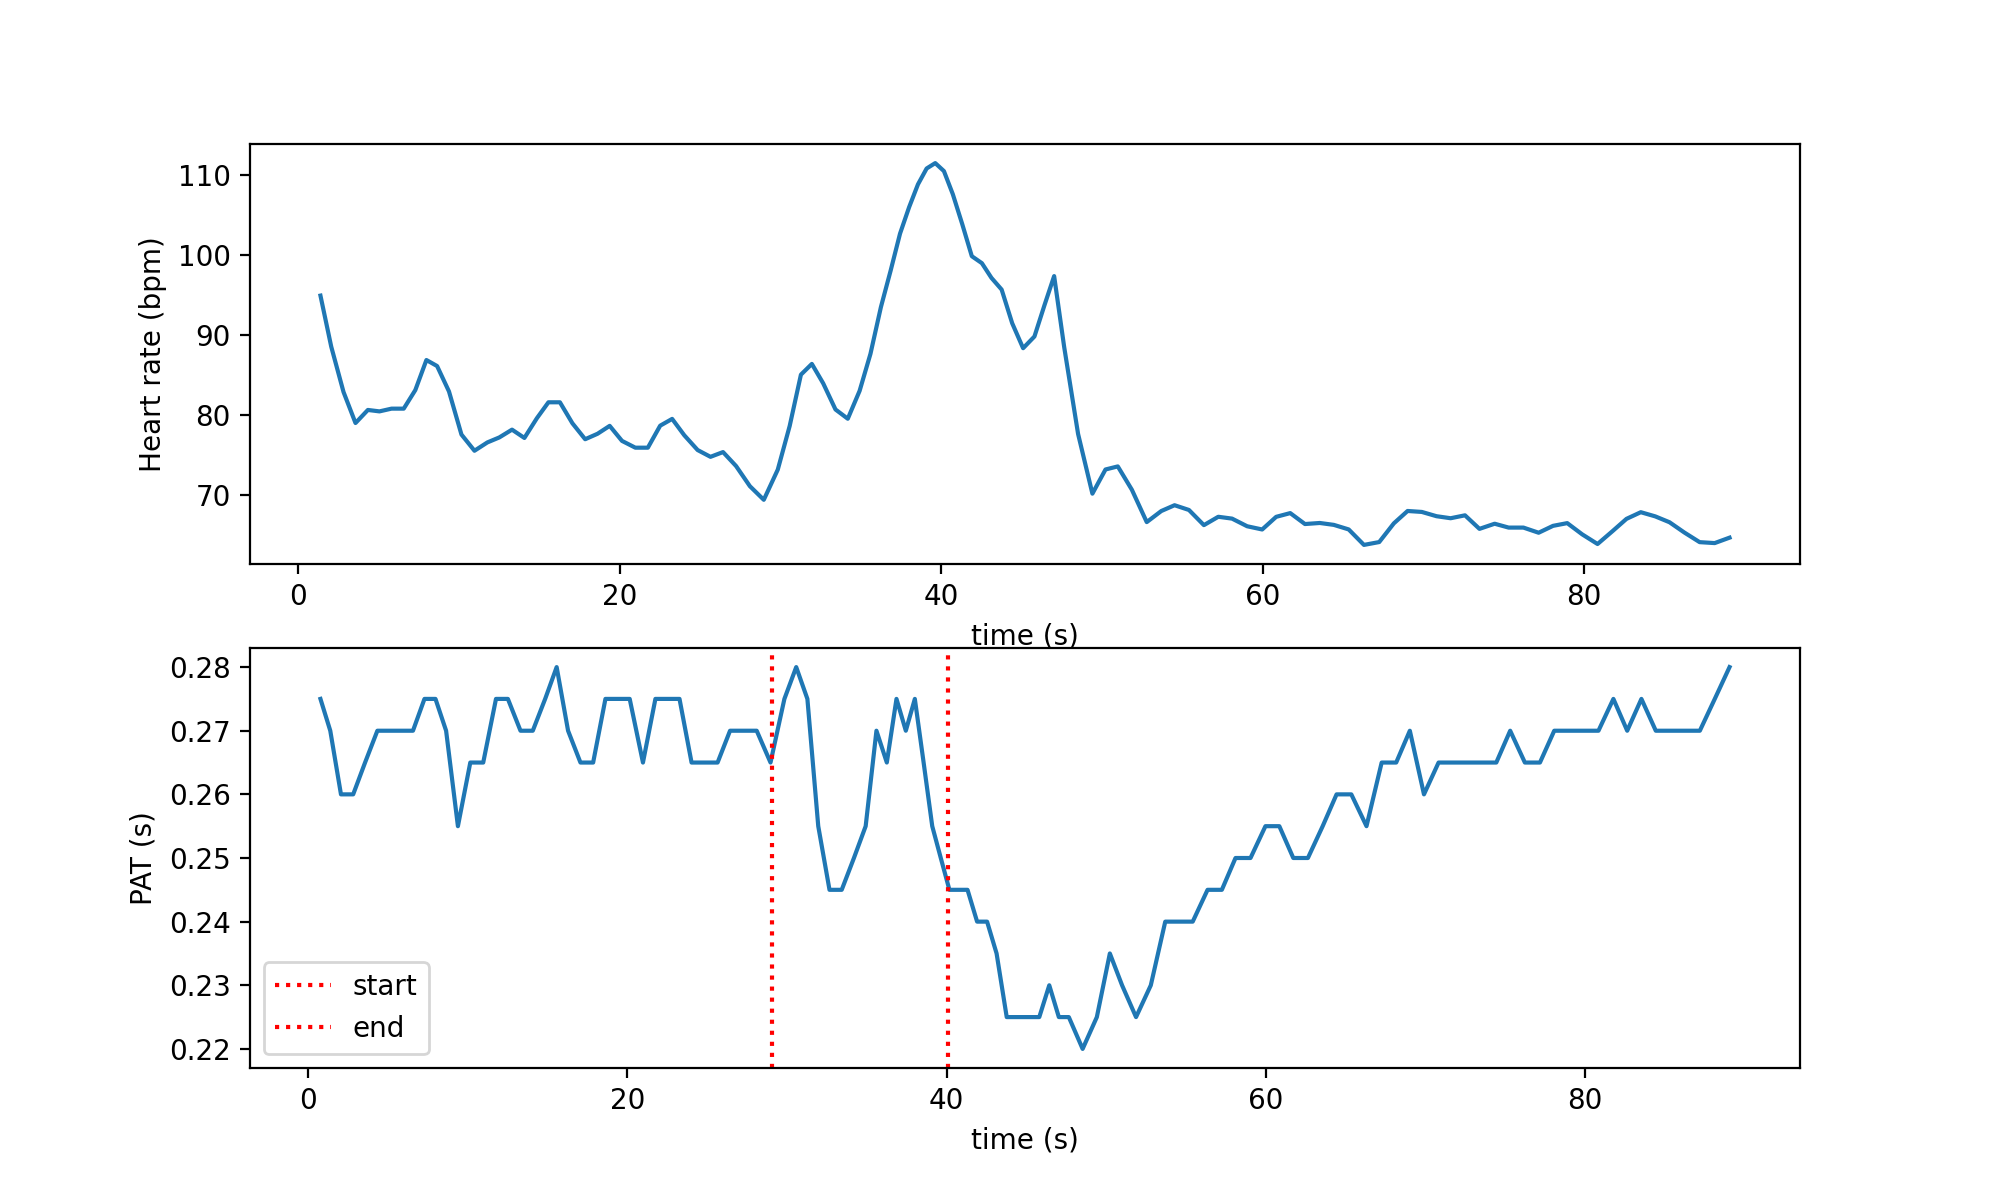

In [24]:
#plot PATpeak between every pair of rpeak&ppeak
fig, axs = plt.subplots(2,1,figsize = (10,6))
ax = axs[0]
ax.plot(heart_rate_ts, heart_rate)
ax.set_xlabel('time (s)')
ax.set_ylabel('Heart rate (bpm)')

ax = axs[1]
ax.plot(PAT_ts, PAT)
ax.axvline(x= val_st_idx2/200, ls = ':', c = 'r', label = 'start')
ax.axvline(x= val_end_idx2/200, ls = ':', c = 'r', label = 'end')
ax.set_xlabel('time (s)')
ax.set_ylabel('PAT (s)')
ax.legend()

In [25]:
len(heart_rate_ts)

112

In [26]:
#200Hz 5s window = 1000samples
#2.5s overlapping step = 500samples
#calculate HR and PATpeak on each 5-second window

win = 1000
step = 500

hr_lis = []
pat_lis = []

for i in range(0, len(ecg_f) - win, 500):
    st_idx = i
    end_idx = i+win
    rpeaks = ecg.ecg(-1*ecg_f[st_idx:end_idx], sampling_rate=200.0, show=False)[2]
    intervals = np.diff(rpeaks)/200
    hr = 60/np.mean(intervals)
    hr_lis.append(hr)
    info = nk.ppg_findpeaks(-1*ppg_f[st_idx:end_idx], sampling_rate=200, method='elgendi', show=False)
    ppeaks = info['PPG_Peaks']
    cor = np.where(ppeaks>=rpeaks[0])
    ppeaks_cor = ppeaks[cor]
    
    maxlen = min(len(ppeaks_cor),len(rpeaks) )
    pat = np.mean((ppeaks_cor[:maxlen] - rpeaks[:maxlen])/200)
    pat_lis.append(pat)


<IPython.core.display.Javascript object>


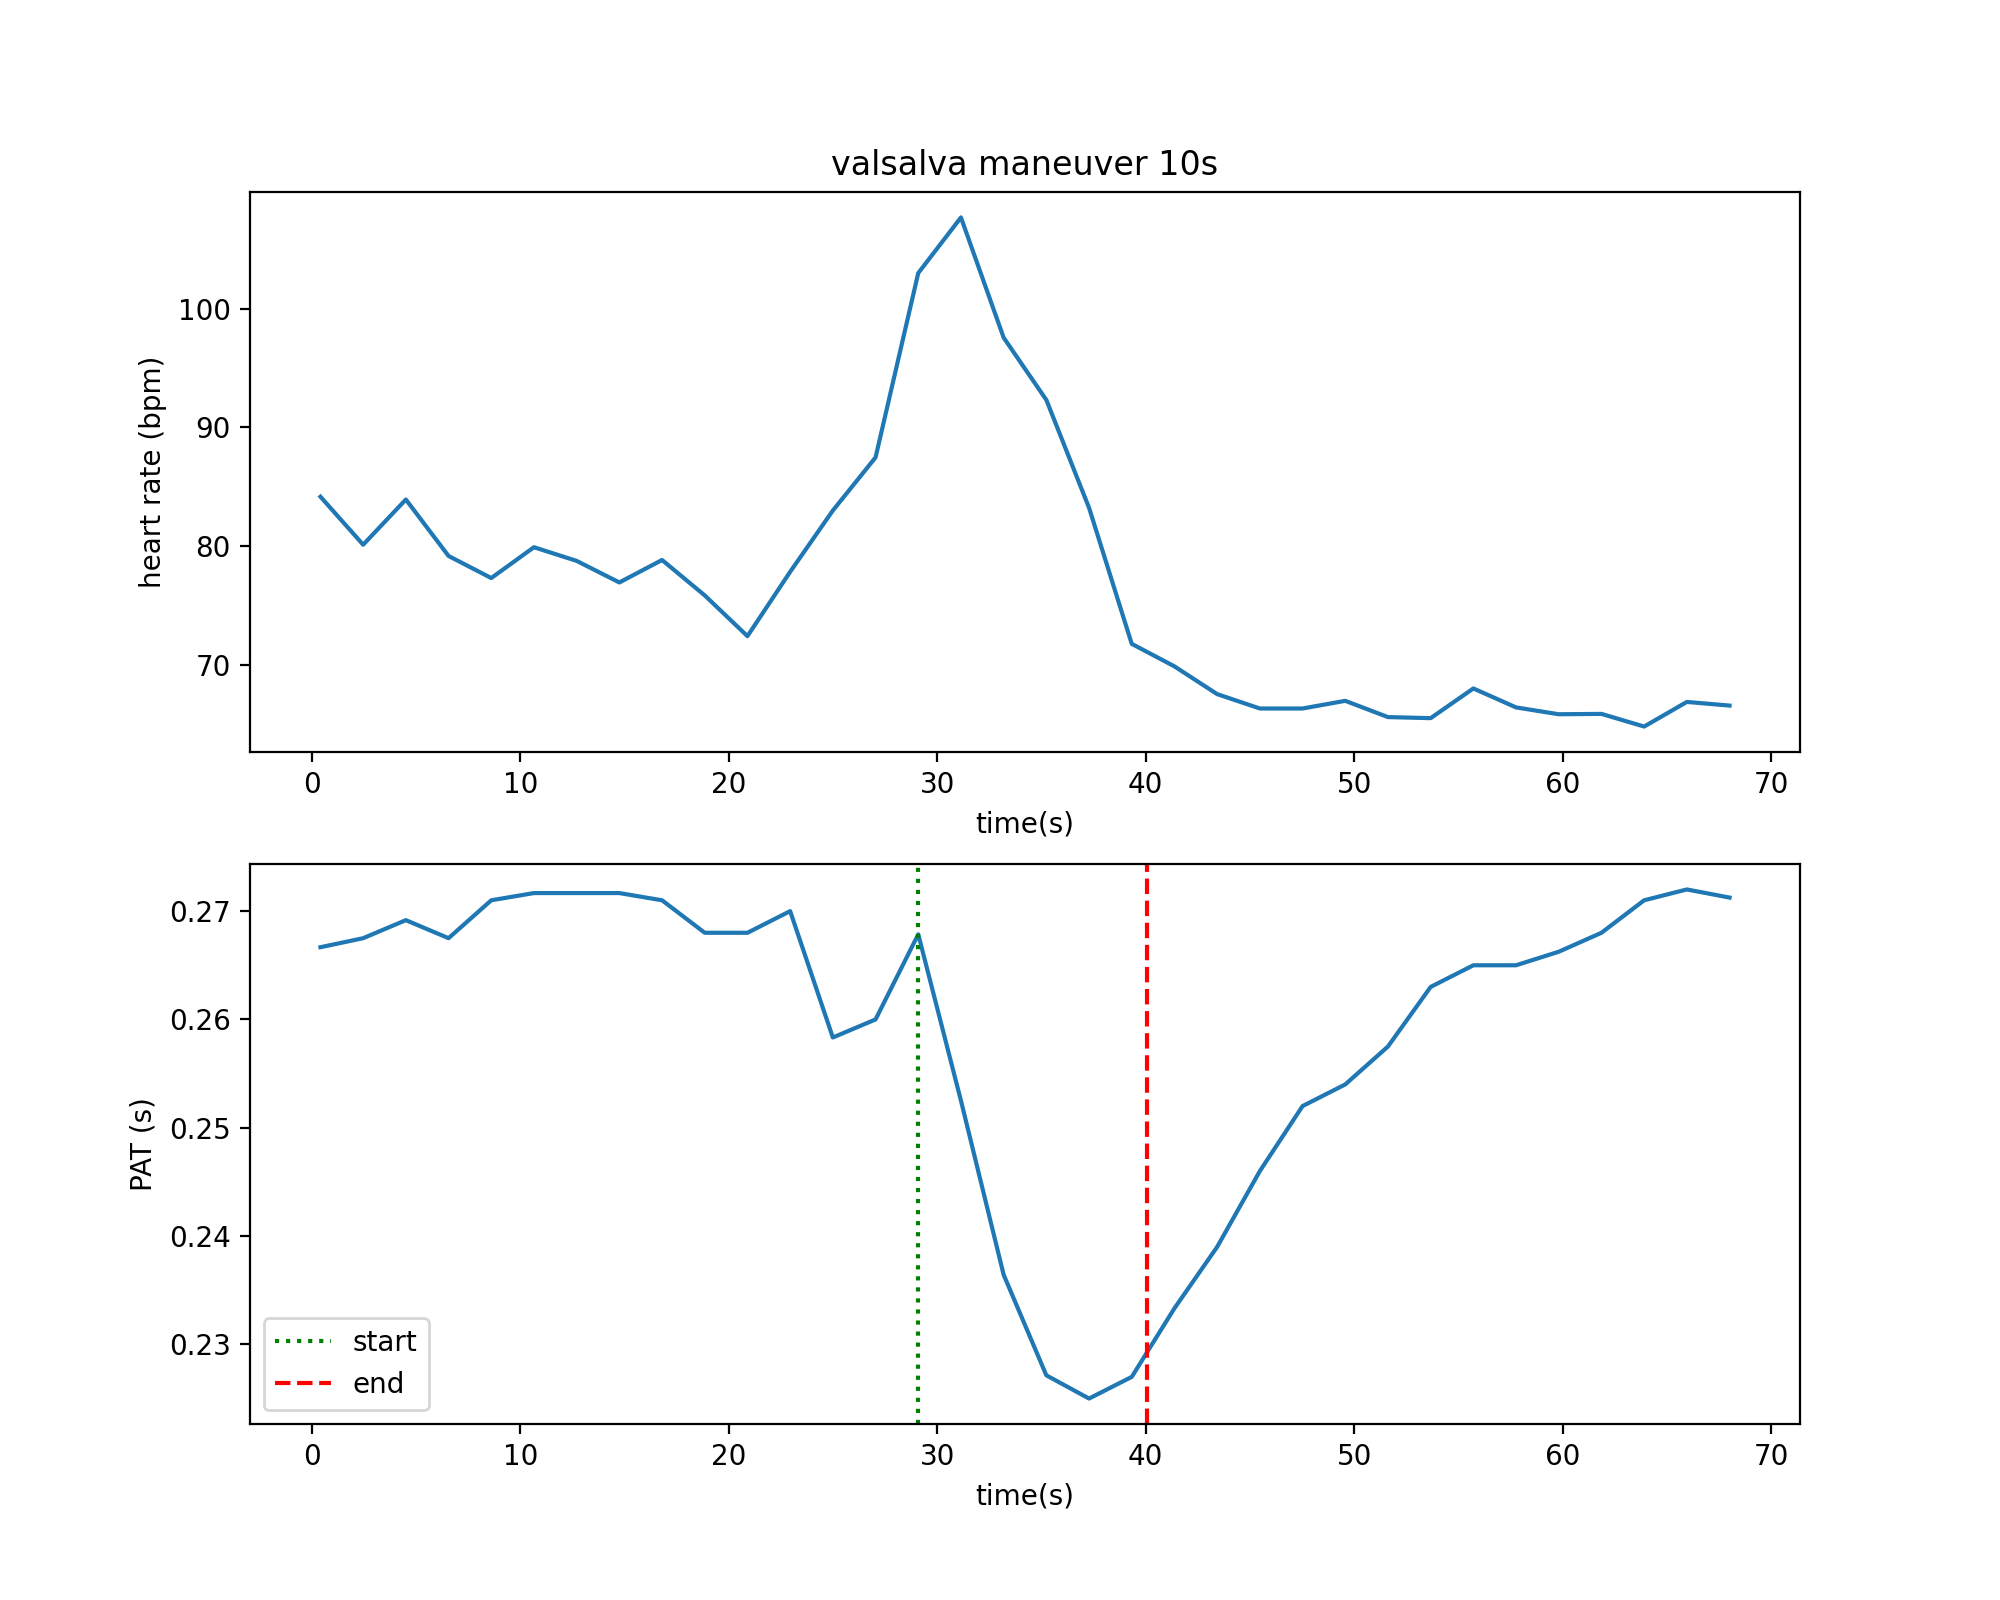

In [27]:
ts_hr = np.linspace(hr_lis[0]/200, len(hr_lis)*2, len(hr_lis))
fig, axs = plt.subplots(2,1,figsize = (10,8))
ax = axs[0]
ax.set_title('valsalva maneuver 10s')
ax.plot(ts_hr, hr_lis)
ax.set_xlabel('time(s)');ax.set_ylabel('heart rate (bpm)')
ax = axs[1]
ax.plot(ts_hr, pat_lis)
ax.axvline(x= val_st_idx2/200, ls = ':', c = 'g', label = 'start')
ax.axvline(x= val_end_idx2/200, ls = '--', c = 'r', label = 'end')
ax.set_xlabel('time(s)'); ax.set_ylabel('PAT (s)')
ax.legend()

## holding breadth

In [28]:
ecg_f = butter_filtering(ecg_bre, 200, [0.1, 50], 5, 'bandpass')
ppg_f = butter_filtering(ppg_bre, 200, [0.5, 10], 5, 'bandpass')

<IPython.core.display.Javascript object>


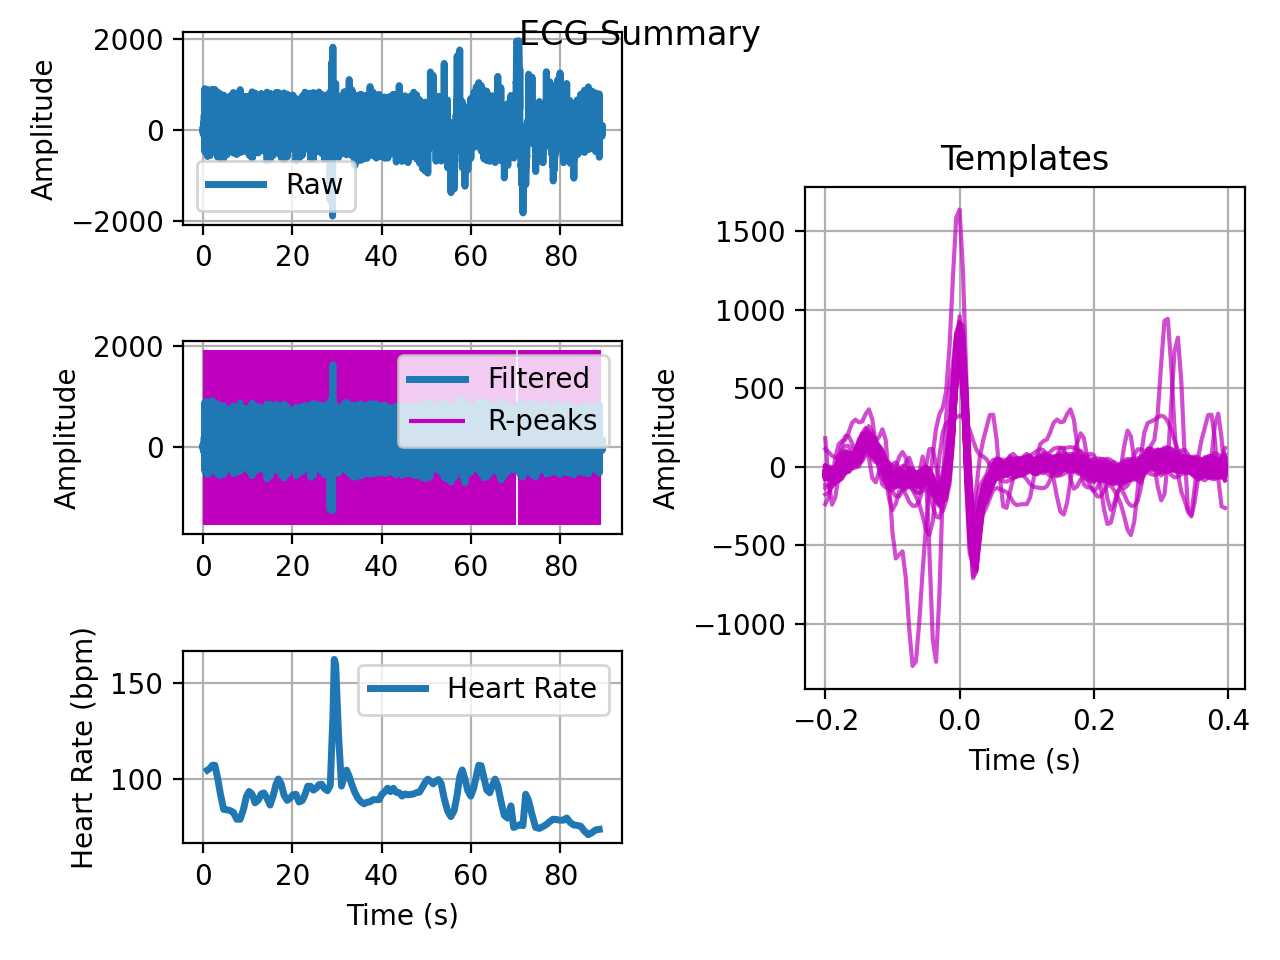

In [29]:
ecg_feat = ecg.ecg(-1*ecg_f, sampling_rate=200.0, show=True)
ts = ecg_feat[0]
filtered = ecg_feat[1]
rpeaks = ecg_feat[2]
templates_ts = ecg_feat[3]
templates = ecg_feat[4]
heart_rate_ts = ecg_feat[5]
heart_rate = ecg_feat[6]

<IPython.core.display.Javascript object>


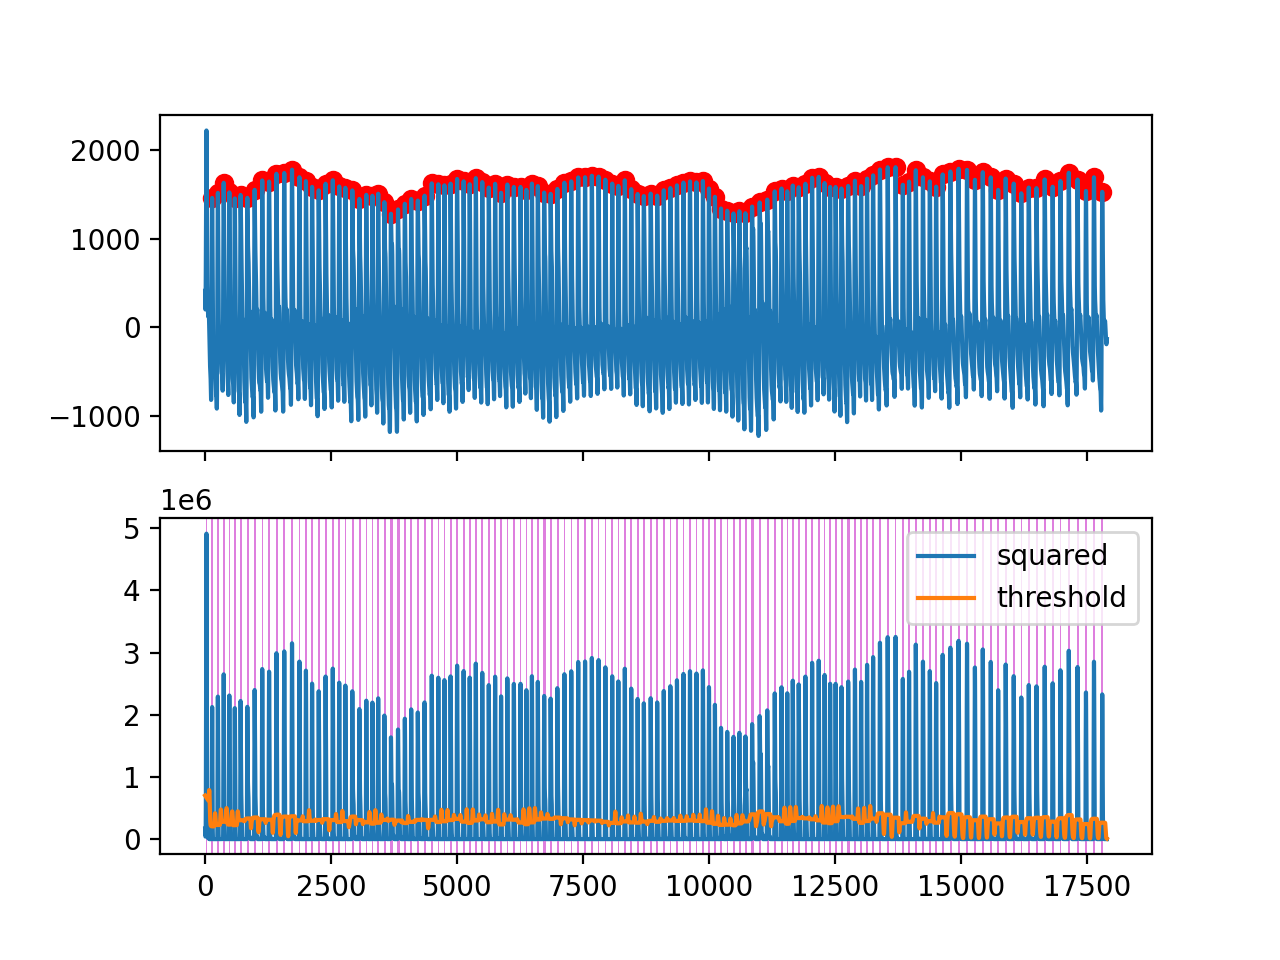

In [30]:
info = nk.ppg_findpeaks(-1*ppg_f, sampling_rate=200, method='elgendi', show=True)
ppeaks = info['PPG_Peaks']


<IPython.core.display.Javascript object>


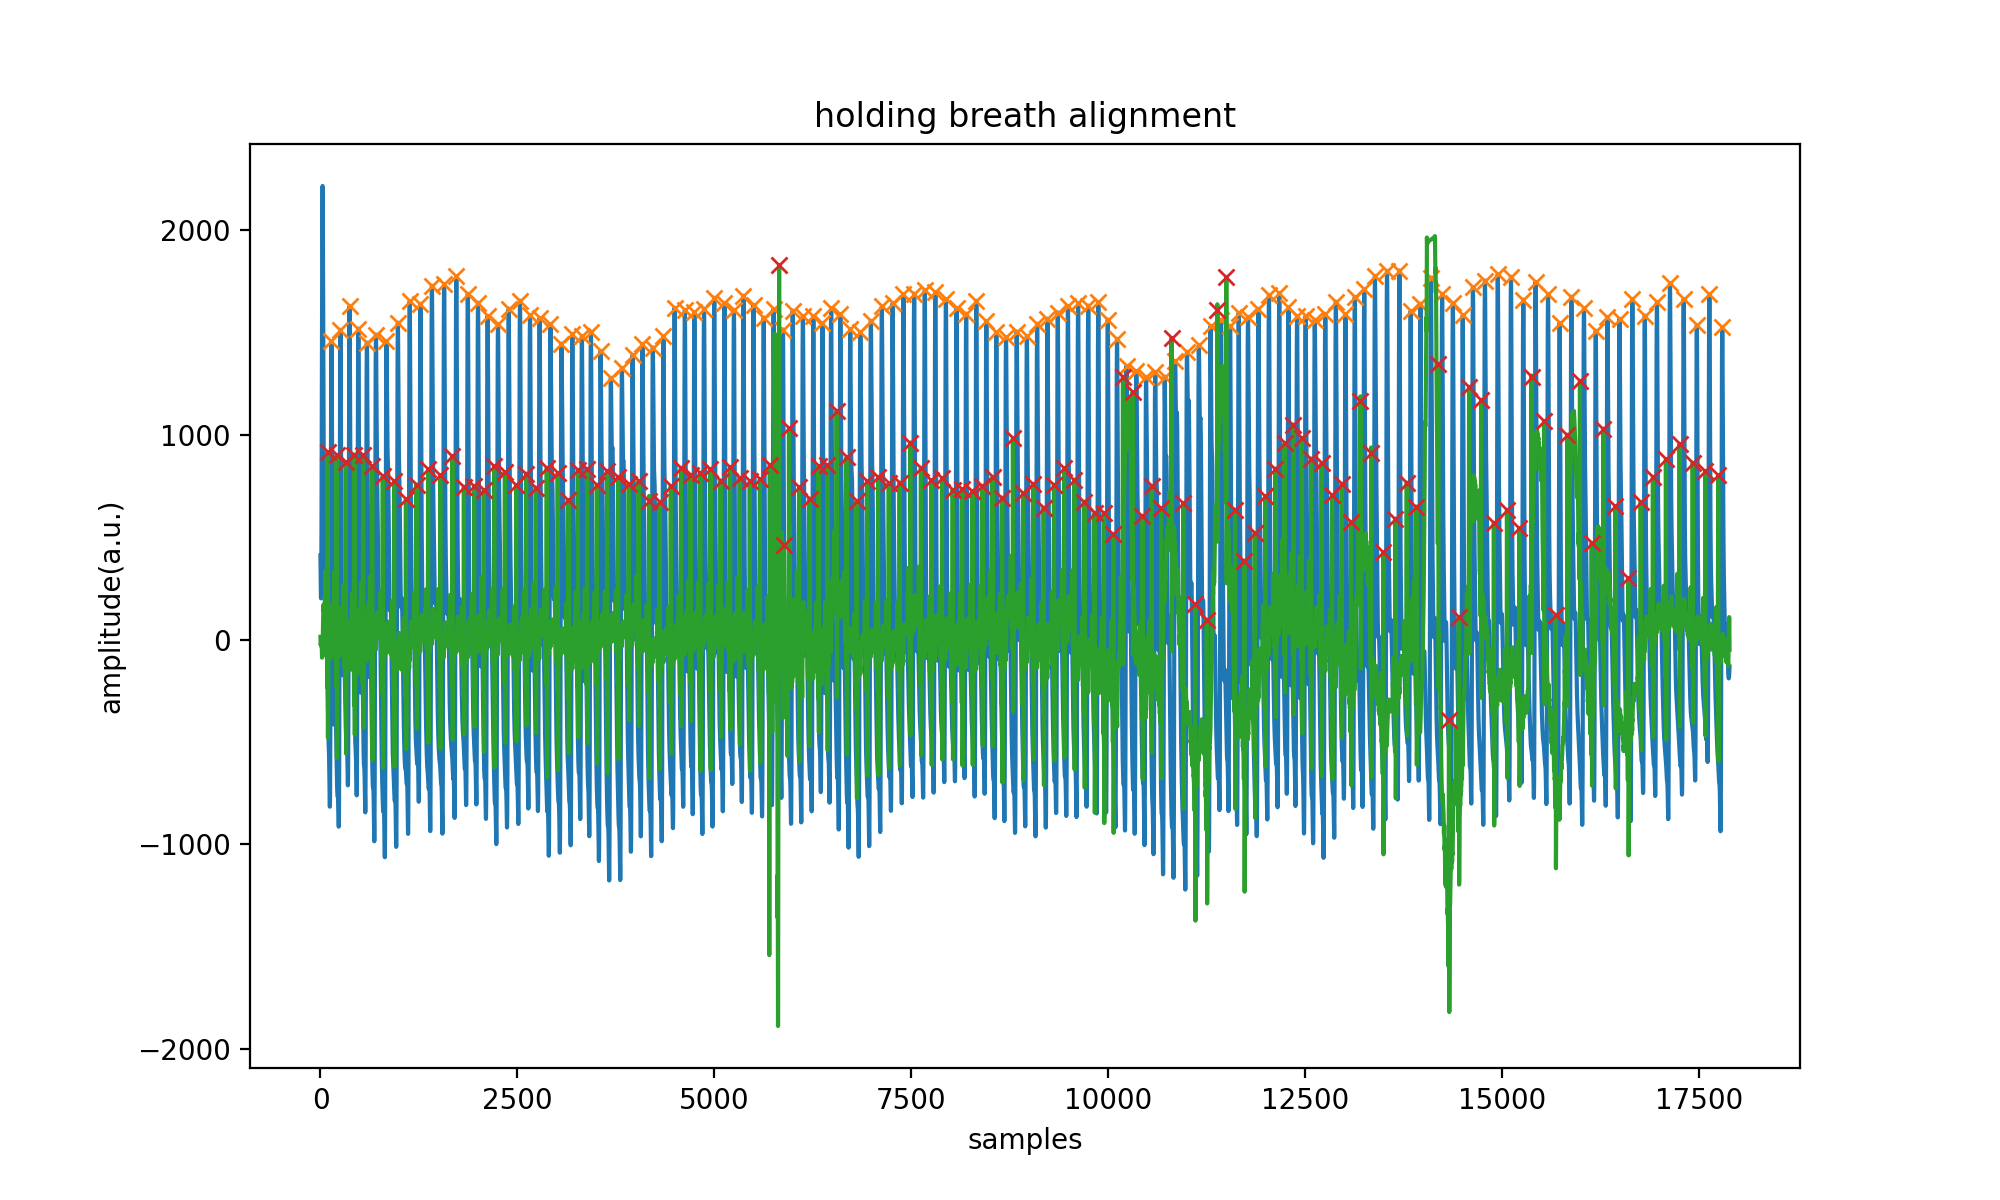

Text(0, 0.5, 'amplitude(a.u.)')

In [31]:
plt.figure(figsize = (10,6))
plt.plot(-1*ppg_f)
plt.plot(ppeaks, -1*ppg_f[ppeaks], 'x')

plt.plot(-1*ecg_f)
plt.plot(rpeaks, -1*ecg_f[rpeaks], 'x')
plt.title('holding breath alignment')
plt.xlabel('samples');plt.ylabel('amplitude(a.u.)')

In [32]:
print(rpeaks)#5883 fix rpeaks manually
rpeaks = np.delete(rpeaks, np.where(rpeaks == 5883))

[   91   205   321   432   541   657   791   935  1085  1220  1366  1521
  1675  1821  1950  2073  2206  2341  2484  2611  2733  2873  3012  3149
  3269  3385  3509  3639  3779  3914  4039  4171  4305  4448  4577  4698
  4822  4951  5080  5200  5322  5450  5579  5705  5823  5883  5948  6076
  6209  6323  6435  6553  6679  6807  6940  7079  7215  7353  7488  7623
  7756  7891  8026  8147  8277  8404  8532  8655  8791  8920  9050  9181
  9312  9441  9571  9699  9827  9947 10066 10187 10311 10435 10551 10672
 10805 10954 11104 11252 11385 11500 11610 11729 11861 11994 12124 12240
 12351 12460 12577 12710 12843 12965 13083 13203 13339 13492 13648 13791
 13914 14191 14327 14452 14582 14735 14897 15063 15219 15375 15534 15681
 15830 15990 16139 16288 16441 16604 16761 16915 17081 17255 17421 17580
 17744]


In [33]:
len(rpeaks)

132

In [34]:
print(ppeaks)#14098
ppeaks = np.delete(ppeaks, np.where(ppeaks == 14098))

[  140   254   369   481   589   704   838   983  1133  1269  1415  1570
  1724  1871  2000  2122  2254  2390  2533  2660  2782  2920  3060  3198
  3319  3434  3556  3687  3827  3962  4088  4220  4354  4496  4626  4747
  4870  4999  5129  5249  5370  5498  5627  5753  5871  5995  6125  6257
  6373  6483  6600  6726  6854  6987  7127  7263  7401  7537  7672  7806
  7940  8076  8197  8326  8453  8580  8703  8839  8968  9099  9229  9360
  9489  9619  9747  9875  9995 10113 10234 10357 10482 10597 10718 10851
 11001 11151 11300 11434 11548 11658 11775 11908 12041 12172 12289 12399
 12507 12623 12756 12891 13013 13131 13251 13387 13540 13697 13841 13964
 14098 14240 14376 14502 14631 14783 14947 15114 15271 15427 15585 15732
 15881 16040 16190 16339 16492 16655 16813 16967 17133 17307 17474 17632
 17796]


In [35]:
len(ppeaks)

132

In [36]:
#take 5peaks each interation
w = 5
hr_br=[]
pat_br=[]
for i in range(0,len(rpeaks)-5):
    st_idx = i
    end_idx = i+5
    
    r = rpeaks[st_idx:end_idx]
    p = ppeaks[st_idx:end_idx]
    
    inter = np.diff(r)/200
    hr = 60/np.mean(inter)
    hr_br.append(hr)
    pat = np.mean((p-r)/200)
    pat_br.append(pat)
    
    
    

<IPython.core.display.Javascript object>


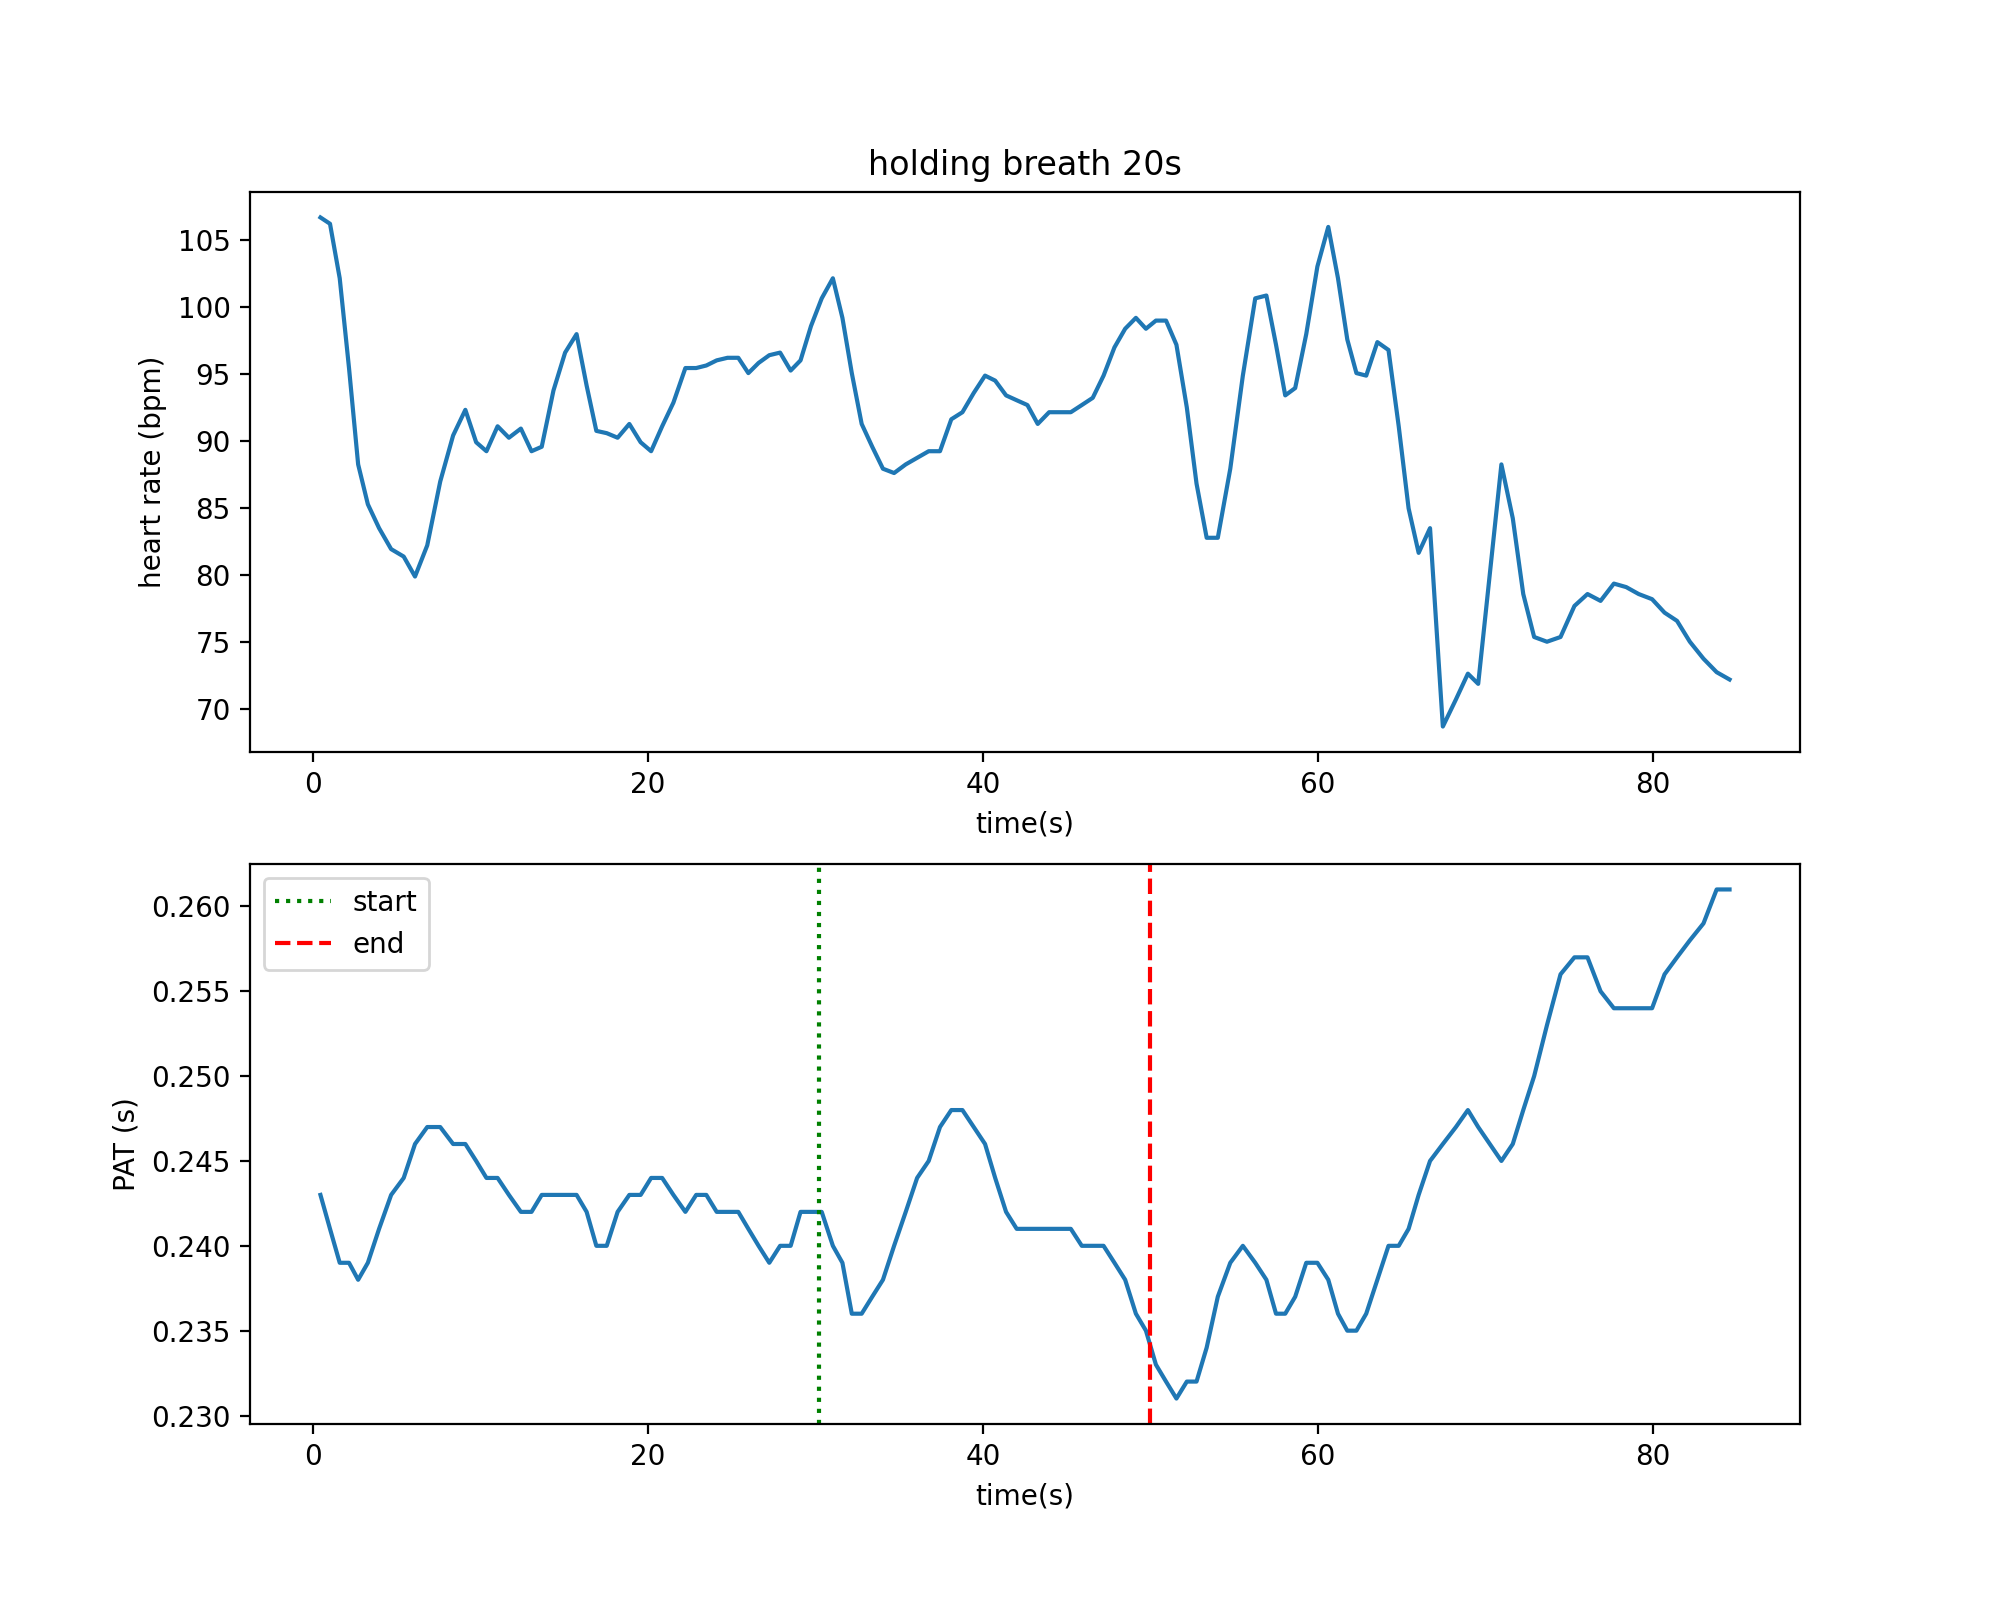

In [37]:
ts_br = rpeaks[:-5]/200

fig, axs = plt.subplots(2,1,figsize = (10,8))
ax = axs[0]
ax.set_title('holding breath 20s')
ax.plot(ts_br, hr_br)
ax.set_xlabel('time(s)');ax.set_ylabel('heart rate (bpm)')
ax = axs[1]
ax.plot(ts_br, pat_br)
ax.axvline(x= bre_st_idx/200, ls = ':', c = 'g', label = 'start')
ax.axvline(x= bre_end_idx/200, ls = '--', c = 'r', label = 'end')
ax.set_xlabel('time(s)'); ax.set_ylabel('PAT (s)')
ax.legend()
